In [1]:
from ml_mmpa import master_functions
import pandas as pd

RDKit WARNING: [17:26:22] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
# carry out mmpa

# clean mmpa
    # first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands
    # Second step is finding unique transforms and calculating paired t-test
    # Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
    
# prodcue functions for mmpa
# summarise results in a table

### MMPA

In [3]:
import sys

def abc(xyz):
    print(xyz)

if __name__ == "__main__":
    abc(sys.argv[1])

-f


In [4]:
# in the console run: 

# ! ./ml_mmpa/master_mmpa.sh data/efflux_mmpa.csv efflux;

# it will result in new items in the 'out' folder.


In [5]:
# Next we process that output:

output = pd.read_csv('out/index_efflux_final.csv')

In [6]:
output

,compound_structure_A,compound_structure_B,idsmiles_A,idsmiles_B,smirks,common_core,measurement_A,measurement_B,measurement_delta,LHS,RHS
0,CN\C(NCCSCc1ccc(CN(C)C)o1)=C/[N+]([O-])=O.Cl,CN\C(NCCSCc1csc(CN(C)C)n1)=C/[N+]([O-])=O,9393,20542,[*:1]NCCSCc1ccc([*:2])o1>>[*:1]NCCSCc1csc([*:2...,[*:1]/C(=C/[N+](=O)[O-])NC.[*:2]CN(C)C,16.52,6.05,-10.47,[*:1]NCCSCc1ccc([*:2])o1,[*:1]NCCSCc1csc([*:2])n1
1,C(=C/c(cc1)ccc1F)(/NC(c2ccccc2)=O)\C(=O)OC(C)C,C(=C\c(cc1)ccc1F)(/C(OCC)=O)\NC(c2ccccc2)=O,17912,44948,[*:1]C(=O)OC(C)C>>[*:1]C(=O)OCC,[*:1]/C(=C/c1ccc(F)cc1)NC(=O)c1ccccc1,6.67,2.79,-3.88,[*:1]C(=O)OC(C)C,[*:1]C(=O)OCC
2,C(=C/c(cc1)ccc1F)(/NC(C)=O)\C(=O)NC(C(C)C)C(O)=O,C(=C/c(cc1)ccc1F)(/NC(C)=O)\C(OCC)=O,47259,23556,[*:1]C(=O)NC(C(=O)O)C(C)C>>[*:1]C(=O)OCC,[*:1]/C(=C/c1ccc(F)cc1)NC(C)=O,-1.58,5.93,7.51,[*:1]C(=O)NC(C(=O)O)C(C)C,[*:1]C(=O)OCC
3,C(=C\c(cc1)cc(c1OC(C)=O)OC)(/C(NCC=C)=O)\NC(c2...,C(=C\c(cc1)cc(c1OC(C)=O)OC)(/C(=O)NCc2ccccc2)\...,10564,9068,[*:1]C(=O)NCC=C>>[*:1]C(=O)NCc1ccccc1,[*:1]/C(=C/c1ccc(OC(C)=O)c(OC)c1)NC(=O)c1ccccc1,6.09,18.06,11.97,[*:1]C(=O)NCC=C,[*:1]C(=O)NCc1ccccc1
4,C(=C\c(cc1)cc(c1OC(C)=O)OC)(/C(=O)NCc2ccccc2)\...,C(=C/c(cc1)cc(c1OC(C)=O)OC)(/NC(c2ccccc2)=O)\C...,9068,25097,[*:1]C(=O)NCc1ccccc1>>[*:1]C(=O)Nc1ccccc1C,[*:1]/C(=C/c1ccc(OC(C)=O)c(OC)c1)NC(=O)c1ccccc1,18.06,13.22,-4.84,[*:1]C(=O)NCc1ccccc1,[*:1]C(=O)Nc1ccccc1C
...,...,...,...,...,...,...,...,...,...,...,...
827187,N1(Cc2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O,N1(c2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O,26921,6632,[*:1]Cc1ccccc1>>[*:1]c1ccccc1,[*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O,8.97,8.72,-0.25,[*:1]Cc1ccccc1,[*:1]c1ccccc1
827188,N1(c2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O,[N+](=O)([O-])c(cc1)cc(c12)SNC2=O,6632,46144,[*:1]c1ccccc1>>[*:1][H],[*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O,8.72,2.22,-6.50,[*:1]c1ccccc1,[*:1][H]
827189,C1(=O)N(C)Sc2c1ccc(c2)[N+](=O)[O-],N1(Cc2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O,24593,26921,[*:1]C>>[*:1]Cc1ccccc1,[*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O,25.55,8.97,-16.58,[*:1]C,[*:1]Cc1ccccc1
827190,C1(=O)N(C)Sc2c1ccc(c2)[N+](=O)[O-],[N+](=O)([O-])c(cc1)cc(c12)SNC2=O,24593,46144,[*:1]C>>[*:1][H],[*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O,25.55,2.22,-23.33,[*:1]C,[*:1][H]


In [7]:
# first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands

output_len = master_functions.clean_mmpa_pairs_len(output) # filter pairs by len LHS & RHS vs CORE

KeyboardInterrupt: 

In [ ]:
'''
Second step is finding unique transforms and calculating paired t-test
It will produce dataframe with columns: smirks	dof	t-stat	p-val (t-test)	measurement_delta	std	sem
Sorted by descending dof

At this point both positive and negative transforms are present.
'''
output_len_stat = master_functions.stat_it_2(output_len)

In [ ]:
# you should save this file..pickle?

output_len_stat.to_pickle("out/output_len_stat.pkl")

output_len_stat.head(5)

In [8]:
output_len_stat = pd.read_pickle("out/output_len_stat.pkl") 


In [9]:
'''
Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
Output is the significant transforms sorted by measurement delta

This is a great output to consider, but we can do one better by turning the transforms into functional groups
'''

mmpa_zero_pos = master_functions.zero_in(output_len_stat, 0.05, pos_only=True)

# Add split columns to the dataframe

mmpa_zero_pos = master_functions.split_transition(mmpa_zero_pos, 'smirks')


Number of unique transforms where p-val < 0.05 is 2836
Split between 2836 positive transforms and 0 negative transforms


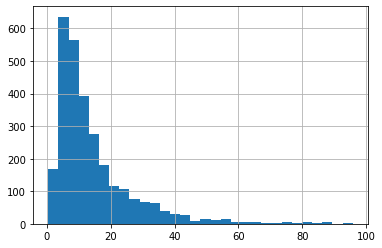

In [10]:
mmpa_zero_pos.measurement_delta.hist(bins=30)

In [ ]:
mmpa_zero_pos.head(20)

In [ ]:
# features_all_neg, l_feats_neg, r_feats_neg = master_functions.calculate_fractions_mk4(mmpa_zero_pos)


In [ ]:
# features_all_neg

In [11]:
features_2_all_neg, l_feats_2_neg, r_feats_2_neg = master_functions.calculate_fractions_mk5(mmpa_zero_pos)


  0%|          | 5/2836 [00:00<00:57, 48.94it/s]

/cluster/uz_lab/dgurvic/git_projects/efflux_mmpa
Generating molecular objects from pre-defined substructures
Calcualting LHS+RHS matches


 64%|██████▍   | 1811/2836 [00:36<00:20, 50.38it/s]RDKit ERROR: [17:27:55] Can't kekulize mol.  Unkekulized atoms: 6 7 8 10
RDKit ERROR: 


KekulizeException: Can't kekulize mol.  Unkekulized atoms: 6 7 8 10


 64%|██████▍   | 1811/2836 [00:50<00:20, 50.38it/s]

In [ ]:
mmpa_zero_pos.iloc[1811]

In [ ]:
features_2_all_neg

In [ ]:
# to_drop = ['arene', 'heteroarene', 'alkyne', 'benzene ring', 'amine', 'azaarene', 'alkene', 'aryl halide', 'alkyl halide', 'leaving group', 'alkenyl halide']

# features_all_dropped_neg = features_2_all_neg.drop(to_drop, axis = 1)

# l_feats_dropped_neg =  l_feats_neg.drop(to_drop, axis = 1)
# r_feats_dropped_neg =  r_feats_neg.drop(to_drop, axis = 1)

# fractions_to_drop=['fr_ketone_Topliss', 'fr_Al_OH_noTert', 'fr_Ar_N', 'fr_methoxy', 'fr_C_O', 'fr_phenol_noOrthoHbond' ]
# fractions above are kept as significant but not looked at on the exchange

fr_sig_descriptors_neg = master_functions.find_sig_feats_mk2(l_feats_2_neg, r_feats_2_neg, 0.01)

In [ ]:
fr_sig_descriptors_neg

In [ ]:

fractions_to_drop=[]

res_neg_neg= master_functions.results_arr(features_2_all_neg, fr_sig_descriptors_neg, r_feats_2_neg, l_feats_2_neg, fractions_to_drop)

In [ ]:
master_functions.plot_feats(res_neg_neg)